<a href="https://colab.research.google.com/github/Jonathan-code-hub/MAT421/blob/main/modulef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Write a function $m y \_n u m \_d i f f \_w \_s m o o t h i n g(x, y, n)$, with the output $[d y, X]$, where $x$ and $y$ are 1D numpy array of the same length, and $n$ is a strictly positive scalar. The function should first create a vector of "smoothed" $y$ data points where $y \_$smooth $[i]=n p$. mean $(y[i-n: i+n])$. The function should then compute $d y$, the derivative of the smoothed $y$-vector using the central difference method. The function should also output a 1D array $X$ that is the same size as $d y$ and denotes the $\mathrm{x}$-values for which $d y$ is valid.

Assume that the data contained in $x$ is in ascending order with no duplicate entries. However, it is possible that the elements of $x$ will not be evenly spaced. Note that the output $d y$ will have $2 n+2$ fewer points than $y$. Assume that the length of $y$ is much bigger than $2 n+2$.

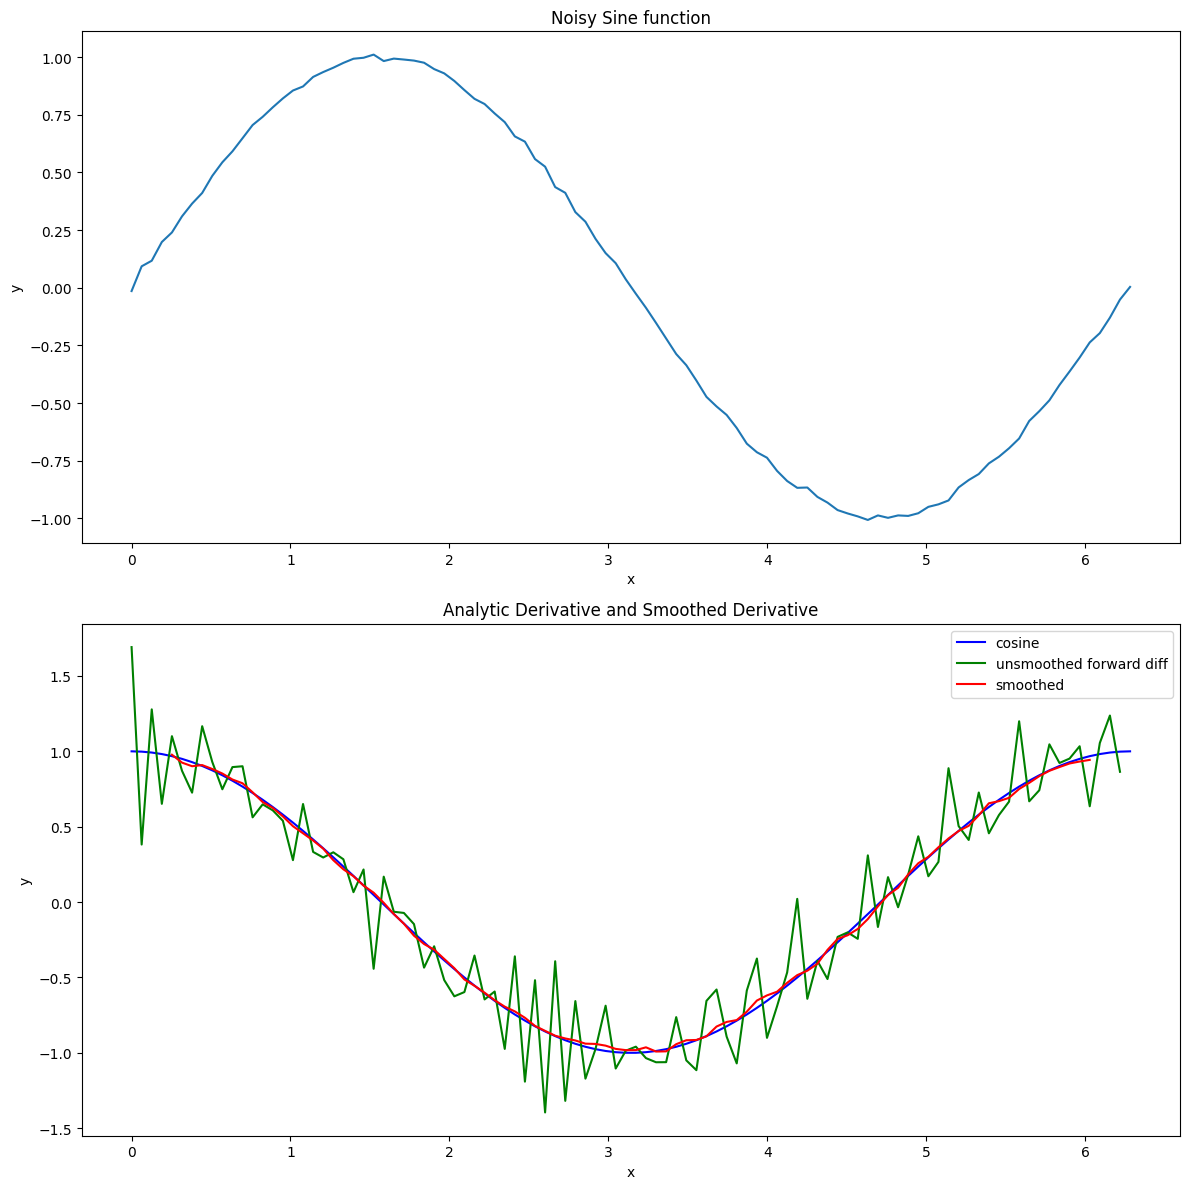

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_num_diff_w_smoothing(x, y, n):

    """
    Calculate the smoothed y data points and compute the derivative
    using central difference method.

    Parameters:
    - x : array, Array of x-values
    - y : numpy array, Array of y-values
    - n : int,  Window size for smoothing

    Output:
    - dy : numpy array, Derivative of the smoothed y-vector
    - X : numpy array, x-values for which dy is valid
    """

    # Ensure n is a positive integer #
    n = int(n)
    if n <= 0:
        raise ValueError("n must be a positive integer")

     # Calculate the smoothed y data points #
     # Here I am using np.covolve instead of np.mean to calculate smooth y vector #
    y_smooth = np.convolve(y, np.ones(2 * n + 1) / (2 * n + 1), mode='valid')

    # Calculate the x-values for which dy is valid #
    X = x[n:-n]

    # Compute the derivative using central difference method #
    dy = np.gradient(y_smooth, X)

    return dy, X

# Testing #
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, size=x.shape)

# Apply smoothing and calculate derivative #
dy, X = my_num_diff_w_smoothing(x, y, 5)



# Test Cases #

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


2. Here I calculate higher order derivatives. The function, higher_order_derivative takes in a function, an array x, and the order of derivative that will be calculated.



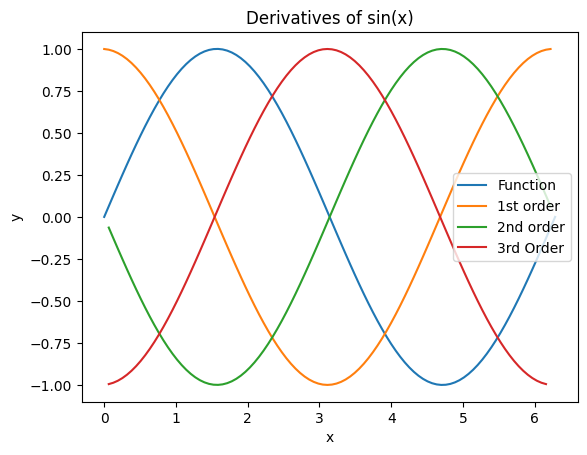

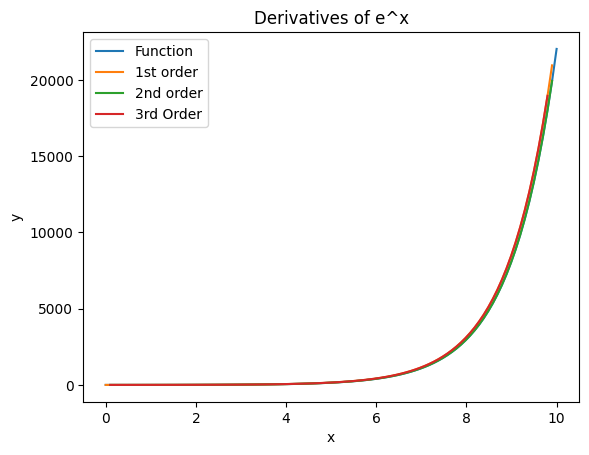

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def higher_order_derivative(f, x, order):
    """
    Calculate higher-order derivatives of y with respect to x.

    Parameters:
    - x : numpy array, Array of x-values.
    - y : numpy array, Array of y-values.
    - order : int, Order of the derivative to be calculated.

    Returns:
    - dy : numpy array
        Higher-order derivative of y-vector.
    - X : numpy array, x-values for which dy is valid.
    """
    # Ensure order is a non-negative integer #
    order = int(order)
    if order < 0:
        raise ValueError("order must be a non-negative integer")

    y = f(x)

    # Calculate step size #
    h = x[1] - x[0]

    # Create a list to store the derivative arrays #
    derivative_arrays = [y]

    # Calculate derivatives using finite difference method #
    for i in range(1, order + 1):
        y_diff = np.diff(derivative_arrays[-1]) / h
        derivative_arrays.append(y_diff)

    # The final array contains the desired derivative #
    dy = derivative_arrays[-1]

    # Calculate X values for the derivative #
    X = x[order//2:len(x) - (order - order//2)]

    return dy, X


# Testing #

def f(x):
  return np.sin(x)

x = np.linspace(0, 2*np.pi, 100)

# Calculate second-order derivative #
dy, X = higher_order_derivative(f, x, 2)

# Plot Results #
plt.plot(x,f(x), label = 'Function')
dy, X = higher_order_derivative(f, x, 1)
plt.plot(X, dy, label = '1st order')
dy, X = higher_order_derivative(f, x, 2)
plt.plot(X, dy, label = '2nd order')
dy, X = higher_order_derivative(f, x, 3)
plt.plot(X, dy, label = '3rd Order')
plt.title('Derivatives of sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


def f(x):
  return np.e**(x)

x = np.linspace(0, 10, 100)

# Calculate second-order derivative #
dy, X = higher_order_derivative(f, x, 2)

# Plot Results #
plt.plot(x,f(x), label = 'Function')
dy, X = higher_order_derivative(f, x, 1)
plt.plot(X, dy, label = '1st order')
dy, X = higher_order_derivative(f, x, 2)
plt.plot(X, dy, label = '2nd order')
dy, X = higher_order_derivative(f, x, 3)
plt.plot(X, dy, label = '3rd Order')
plt.title('Derivatives of e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()